In [1]:
import pandas as pd 
%matplotlib notebook
import seaborn as sns 
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error
from sklearn import tree 
from matplotlib import pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn import svm
from sklearn.svm import SVC
import numpy as np
from decimal import Decimal, ROUND_HALF_UP
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline
sns.set(style = 'darkgrid')
sns.set_palette('deep')

In [3]:
data =pd.read_csv("Breast_cancer_dataa.csv")
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


### Veri Önişleme ###

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.max()

mean_radius          28.1100
mean_texture         39.2800
mean_perimeter      188.5000
mean_area          2501.0000
mean_smoothness       0.1634
diagnosis             1.0000
dtype: float64

In [7]:
data.min()

mean_radius         0.00
mean_texture        9.71
mean_perimeter     43.79
mean_area           0.00
mean_smoothness     0.00
diagnosis           0.00
dtype: float64

In [8]:
data.eq(0).sum()

mean_radius          2
mean_texture         0
mean_perimeter       0
mean_area            1
mean_smoothness      1
diagnosis          212
dtype: int64

In [9]:
data[['mean_radius','mean_area','mean_smoothness']]=data[['mean_radius','mean_area','mean_smoothness']].replace(0,np.NaN)

In [10]:
data.fillna(data.mean(), inplace=True)

In [11]:
data.min()

mean_radius          6.98100
mean_texture         9.71000
mean_perimeter      43.79000
mean_area          143.50000
mean_smoothness      0.05263
diagnosis            0.00000
dtype: float64

In [12]:
data.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.320959,0.995861,0.984931,0.167987,-0.727056
mean_texture,0.320959,1.000000,0.329533,0.318000,-0.023028,-0.415185
mean_perimeter,0.995861,0.329533,1.000000,0.985549,0.207483,-0.742636
mean_area,0.984931,0.318000,0.985549,1.000000,0.176934,-0.707399
mean_smoothness,0.167987,-0.023028,0.207483,0.176934,1.000000,-0.358757
diagnosis,-0.727056,-0.415185,-0.742636,-0.707399,-0.358757,1.000000


<AxesSubplot:>

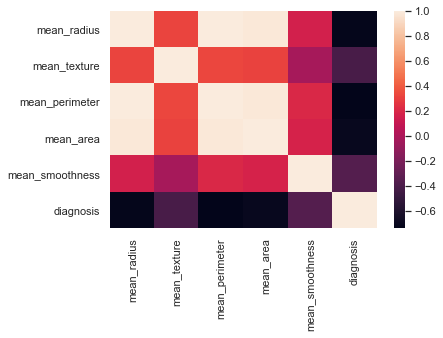

In [13]:
sns.heatmap(data.corr())

In [56]:
data.corr().nlargest(5,'diagnosis').index

Index(['diagnosis', 'mean_smoothness', 'mean_texture', 'mean_area',
       'mean_radius'],
      dtype='object')

<AxesSubplot:xlabel='mean_perimeter'>

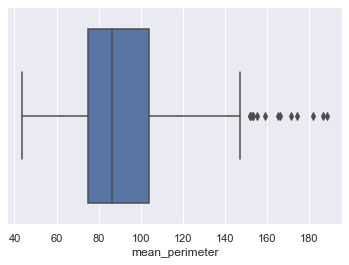

In [14]:
sns.boxplot(x=data['mean_perimeter'])

In [15]:
data = data.drop(data.index[data['mean_perimeter'] >= 181.2])


<AxesSubplot:xlabel='mean_texture'>

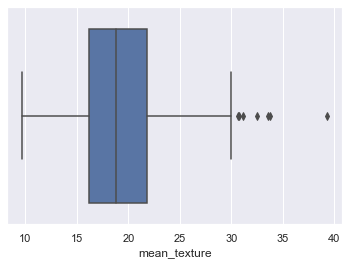

In [16]:
sns.boxplot(x=data['mean_texture'])

In [17]:
data = data.drop(data.index[data['mean_texture'] >= 37.8])

<AxesSubplot:xlabel='mean_area'>

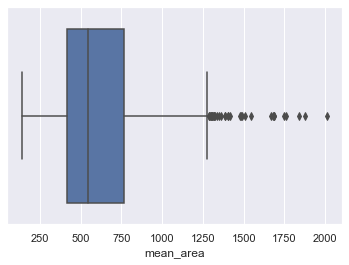

In [18]:
sns.boxplot(x=data['mean_area'])

In [19]:
data = data.drop(data.index[data['mean_area'] >=1917])

<AxesSubplot:xlabel='mean_radius'>

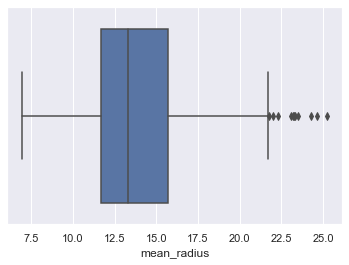

In [20]:
sns.boxplot(x=data['mean_radius'])

In [21]:
data = data.drop(data.index[data['mean_radius'] >=24.23])

## Logistic Regression ##

In [23]:
X = data[['mean_perimeter', 'mean_texture', 'mean_area','mean_radius']]
X

,mean_perimeter,mean_texture,mean_area,mean_radius
0,122.80,10.38,1001.0,17.99
1,132.90,17.77,1326.0,20.57
2,130.00,21.25,1203.0,19.69
3,77.58,20.38,386.1,11.42
4,135.10,14.34,1297.0,20.29
...,...,...,...,...
564,142.00,22.39,1479.0,21.56
565,131.20,28.25,1261.0,20.13
566,108.30,28.08,858.1,16.60
567,140.10,29.33,1265.0,20.60


In [24]:
y=data['diagnosis']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 561, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
lr = LogisticRegression(max_iter = 10000,solver='lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [27]:
predictions = lr.predict(X_test)

In [28]:
pred = pd.DataFrame({'Gerçek': y_test.tolist(), 'Tahmin': predictions.tolist()}).head(25)
pred.head(10)

,Gerçek,Tahmin
0,0,1
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,1,1
9,1,1


In [29]:
tahmin1=lr.predict(X_test)
error1=tahmin1
tahmin1=accuracy_score(y_test,tahmin1)
tahmin1 = round(tahmin1*100,4)
tahmin1 

90.2655

In [30]:
accuracymean=cross_val_score(estimator=lr,X=X_train,y=y_train,cv=10)
print(accuracymean.mean()*100)
linregscor = round(accuracymean.mean()*100,4)


90.63636363636363


In [31]:
resultcros = []
resultnorm = []
resultnorm.append(tahmin1)
resultcros.append(linregscor)

In [61]:
list_errors = []
error_1=mean_squared_error(y_test,error1)
list_errors.append(error_1)


## Decision Tree ##


In [33]:
liste = data.columns.tolist()
liste.remove('mean_smoothness')
liste.remove('diagnosis')
liste

['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area']

In [34]:
X = data[liste].copy()
X.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area'], dtype='object')

In [35]:
y = data[['diagnosis']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [37]:
y = y_train.values.ravel()
y_train = np.array(y).astype(int)

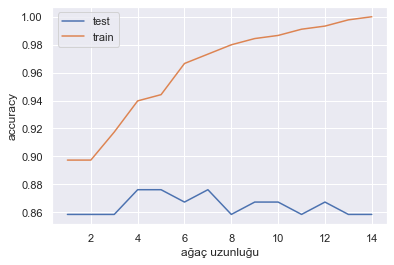

In [38]:
max_depth = []
acc_train = []
acc_test = []
for i in range(1,15):
 
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred1 = dtree.predict(X_test)
 acc_test.append(accuracy_score(y_test, pred1))
 pred2 = dtree.predict(X_train)
 acc_train.append(accuracy_score(y_train, pred2))
 ####
 max_depth.append(i)
 d = pd.DataFrame({'accuracy_test':pd.Series(acc_test), 
 'accuracy_train':pd.Series(acc_train),
 'max_depth':pd.Series(max_depth)})

plt.plot('max_depth','accuracy_test', data=d, label='test')
plt.plot('max_depth','accuracy_train', data=d, label='train')
plt.xlabel('ağaç uzunluğu')
plt.ylabel('accuracy')
plt.legend()


In [39]:
d

,accuracy_test,accuracy_train,max_depth
0,0.858407,0.897321,1
1,0.858407,0.897321,2
2,0.858407,0.917411,3
3,0.876106,0.939732,4
4,0.876106,0.944196,5
5,0.867257,0.966518,6
6,0.876106,0.973214,7
7,0.858407,0.979911,8
8,0.867257,0.984375,9
9,0.867257,0.986607,10


In [40]:
decisiontree = tree.DecisionTreeClassifier(max_depth=5,criterion='entropy',random_state=0)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

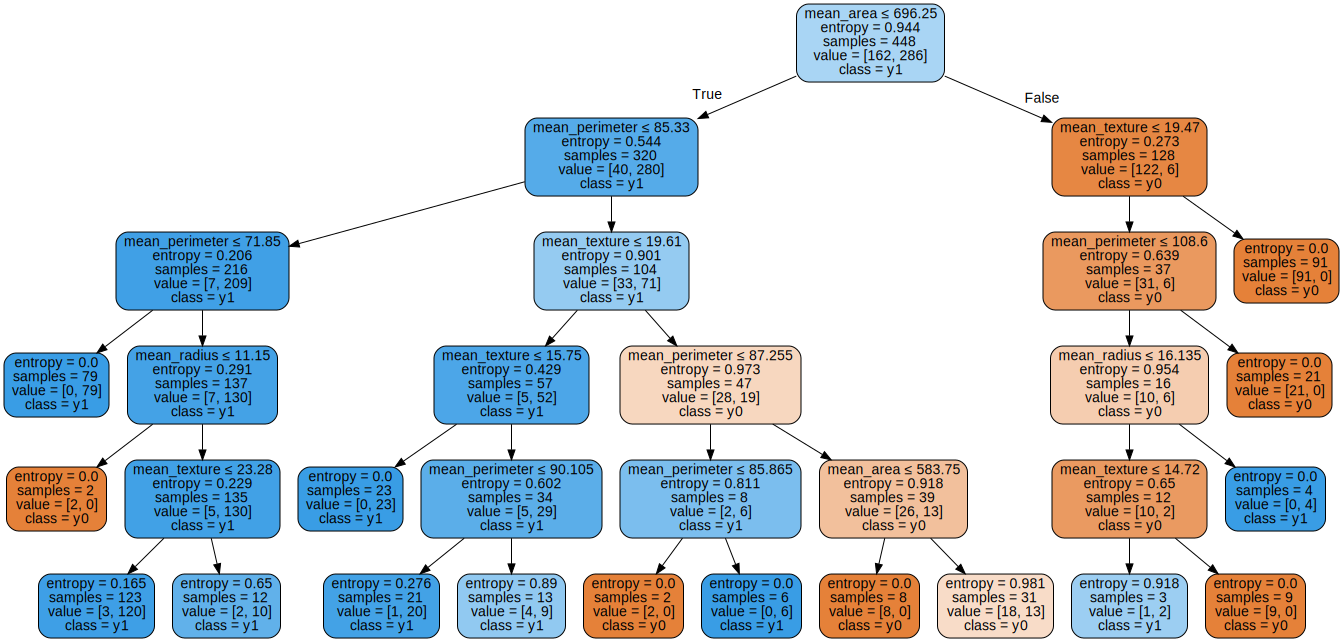

In [41]:
dot_data = tree.export_graphviz(decisiontree, out_file=None, 
                              feature_names=X.columns,  
                              class_names=True,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [42]:
tahmin2 = decisiontree.predict(X_test)
error2=tahmin2
tahmin2=accuracy_score(y_test,tahmin2)
tahmin2 = round(tahmin2*100,4)
tahmin2 

88.4956

In [43]:
accuracymean=cross_val_score(estimator=decisiontree,X=X_train,y=y_train,cv=10)
print(accuracymean.mean()*100)
decisionscor = round(accuracymean.mean()*100,4)

resultnorm.append(tahmin2)
resultcros.append(decisionscor)

88.40909090909092


In [60]:
error_2=mean_squared_error(y_test,error2)
list_errors.append(error_2)


0.5132743362831859

## SVM ##

In [45]:
X=data[['mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']]
X

,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,10.38,122.80,1001.0,0.11840
1,17.77,132.90,1326.0,0.08474
2,21.25,130.00,1203.0,0.10960
3,20.38,77.58,386.1,0.14250
4,14.34,135.10,1297.0,0.10030
...,...,...,...,...
564,22.39,142.00,1479.0,0.11100
565,28.25,131.20,1261.0,0.09780
566,28.08,108.30,858.1,0.08455
567,29.33,140.10,1265.0,0.11780


In [46]:
y = data[['diagnosis']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 0)

In [48]:
svc = SVC(kernel='poly',degree=2,gamma='auto')

In [49]:
y = y_train.values.ravel()
y_train = np.array(y).astype(int)

In [50]:
svc.fit(X_train,y_train)

SVC(degree=2, gamma='auto', kernel='poly')

In [51]:
tahmin3 = svc.predict(X_test)
error3=tahmin3
tahmin3=accuracy_score(y_test,tahmin3)
tahmin3 = round(tahmin3*100,4)
tahmin3

88.4956

In [52]:
accuracymean=cross_val_score(estimator=svc,X=X_train,y=y_train,cv=10)
print(accuracymean.mean()*100)
svmscor = round(accuracymean.mean()*100,4)

resultnorm.append(tahmin3)
resultcros.append(svmscor)

91.30303030303031


In [57]:
error_3=mean_squared_error(y_test,error3)
list_errors.append(error_3)
error_3

0.11504424778761062

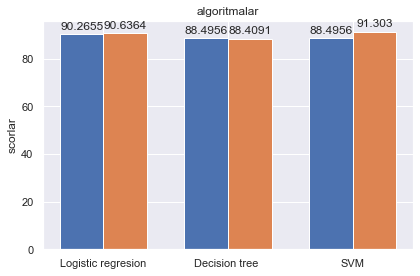

In [54]:
labels = ['Logistic regresion','Decision tree ', 'SVM']

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, resultnorm, width)
rects2 = ax.bar(x + width/2, resultcros, width)


ax.set_ylabel('scorlar')
ax.set_title('algoritmalar')
ax.set_xticks(x)
ax.set_xticklabels(labels)



def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

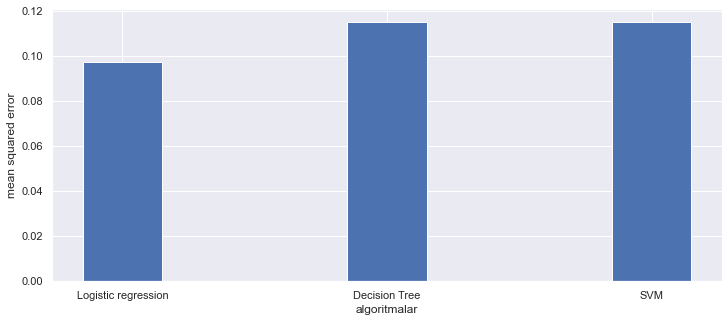

In [55]:
plt.figure(figsize=(12,5))
plt.bar(['Logistic regression', 'Decision Tree','SVM'],list_errors,width=0.3)
plt.xlabel('algoritmalar')
plt.ylabel('mean squared error')
plt.show()
